# 

## Overview
### For this project, we will analyze data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.

#### The questions being asked are:
#### Is life Expectancy correlated to the GDP
#### Does GDP and LE increase with time
#### What are the average LE and GDP by country
#### Does Country effect GDP and LE

#### Import Python modules

In [419]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

#### Import and read data

In [420]:
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


#### The columns contain 'Country', 'Year', 'Life expectancy at birth (years)', 'GDP'. 

#### Find names of countries

In [421]:
countries = df.Country.unique()
print(countries)


['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


#### Find span of years 

In [422]:
print(sorted(df.Year.unique()))

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


#### After noticing the column Life expectancy at birth (years) was long and complicated compared to the other column names, I decided to change column name of 	Life expectancy at birth (years)	 to LE & United States of America to USA to shorten the label on the plots

In [423]:
df = df.rename(columns={'Life expectancy at birth (years)':'LE'})
df['Country'] = df['Country'].replace('United States of America', 'USA')

countries = df.Country.unique()

#### So far we have gathered what the data is tracking including 6 countries over a span of 15 years, life expectancy from birth in years as well as GDP for a given year. GDP stands for gross domestic product. It's a measure of a country's economic performance, and is used as a health check for the country's economy. GDP is the total value of all goods and services produced and sold within a country over a specific period of time, usually one year. It's a standard measure of the value added created through the production of goods and services in a country during a certain period. GDP is one of the most widely used indicators of economic performance. 
#### A GDP of 2-3% increase per year is considered normal.

### To begin we plot the GDP and LE on a histogram.

<AxesSubplot:xlabel='GDP', ylabel='Count'>

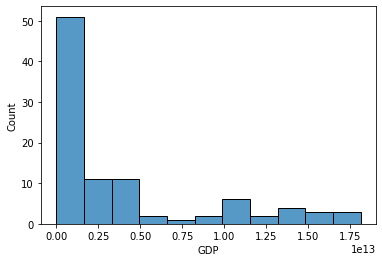

In [424]:
sns.histplot(df.GDP)

<AxesSubplot:xlabel='LE', ylabel='Count'>

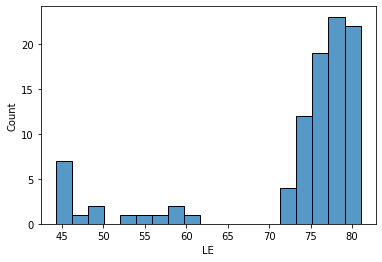

In [425]:
sns.histplot(df.LE)

#### GDP is heavily skewed right while LE is skewed Left. Although this data doesnt tell us much other than skewness exploring the data more will open up more insight

### First mean average LE of each country

In [426]:
df_means = df.groupby('Country').mean()

<AxesSubplot:xlabel='LE', ylabel='Country'>

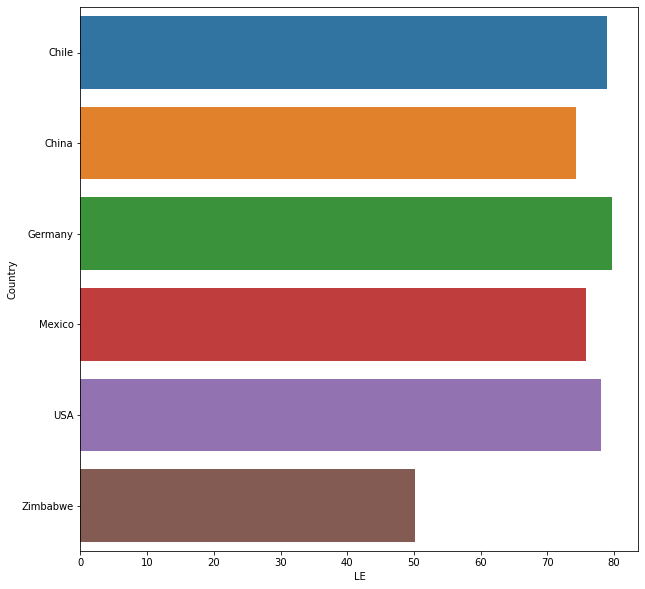

In [427]:
plt.figure(figsize=(10,10))
sns.barplot(data=df_means, x="LE", y=df_means.index)

#### The barplot is showing a mean average life expectancy in the upper 70s for all countries except Zimbabwe which has a mean average of 50 being much lower than the other countries 
#### Here we plot the average GDP per country

,LE,GDP
Country,,
Chile,78.94375,1.697888e+11
China,74.26250,4.957714e+12
Germany,79.65625,3.094776e+12
Mexico,75.71875,9.766506e+11
USA,78.06250,1.407500e+13
Zimbabwe,50.09375,9.062580e+09


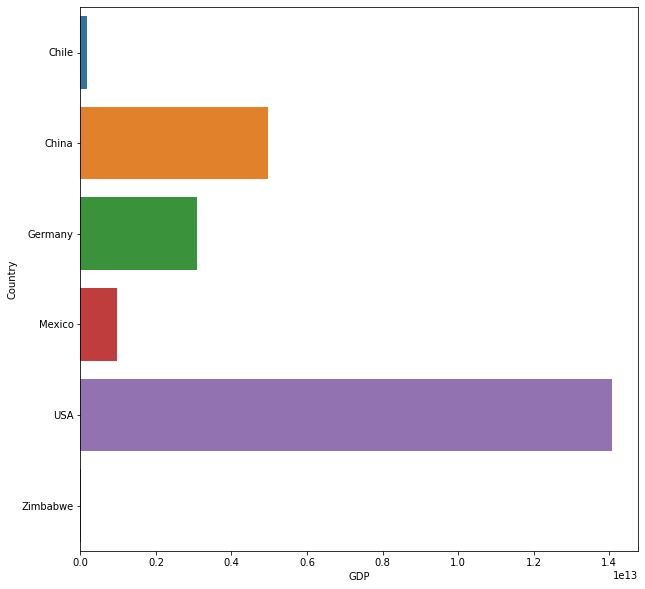

In [428]:
plt.figure(figsize=(10,10))
sns.barplot(data=df_means, x="GDP", y=df_means.index)
df_means.drop(columns='Year')

#### This shows United States to be very high compared to the other countries with china tailing, Zimbabwe non existant on the plot for mean average GD

### A look at how LE and GDP has increase over time will yield more insight into if they are associated

<AxesSubplot:xlabel='Year', ylabel='LE'>

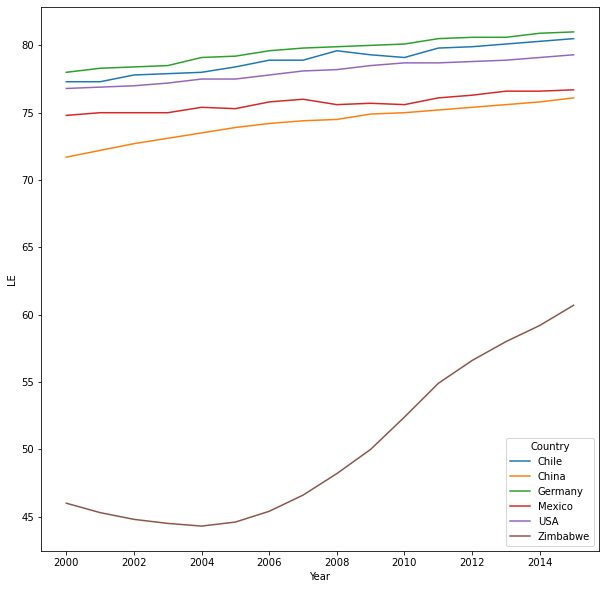

In [429]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df, x='Year', y='LE', hue=df.Country)

#### Here the LE of all countries has increased over time, Zimbabwe showing the largest increase in LE


### Then we plot the GDP by Country

<AxesSubplot:xlabel='Year', ylabel='GDP'>

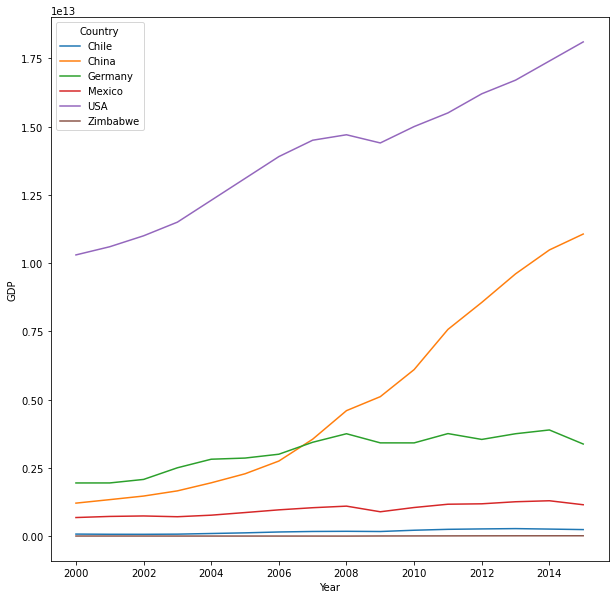

In [430]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df, x='Year', y='GDP', hue=df.Country)

#### The lineplot is showing a large increase in GDP for countries United States and China, a slight increase overall for Germany dipping down in 2015, and slight increase for countries Mexico, Chile. Zimbabwe is showing almost no increase overall showcasing the economic depression of the country. This plot explains the right skewness of the GDP histogram where the majority of countries have lower GDP while Zimbabwe has almost nothing compared to China and the USA.

#### So far time doesnt have the same positive effect on GDP for all countries and isnt strongly correlated to an increase GDP, although we dont have data on why GDP is increasing overall

#### Next we explore if GDP and Life Expectancy have any correlation and the average Life expectancy of each country.

#### GDP and LE by Country

<AxesSubplot:xlabel='Life Expectancy at Birth (Years)', ylabel='Gross Domestic Product'>

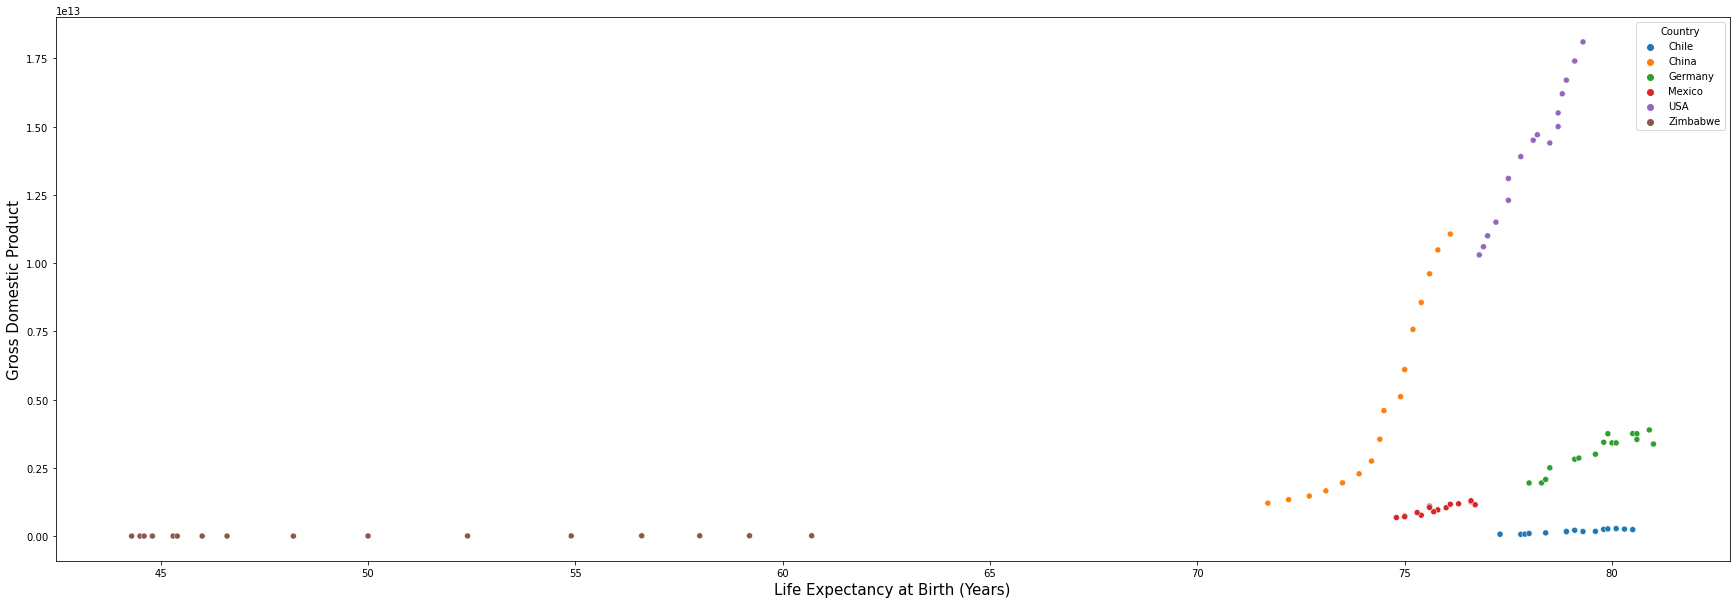

In [431]:
plt.figure(figsize=(30,10))
plt.xlabel('Life Expectancy at Birth (Years)', fontsize=15)
plt.ylabel('Gross Domestic Product', fontsize=15)
sns.scatterplot(data=df, x='LE', y='GDP', hue='Country')

#### The plot here shows an increase in LE as GDP also increases, although different based on each country, Chile showing an increase in LE without a dramatic increase in GDP, the USA and China showing huge increases in GDP with small but consistent increases in LE, Mexico and Germany showing relative increases in both GDP and LE and Zimbabwe showing neither increase in LE or GDP


#### To get a better look at the GDP to LE we will next show each individual countries GDP vs LE on separate plots

### Plots showing GDP vs LE by Country

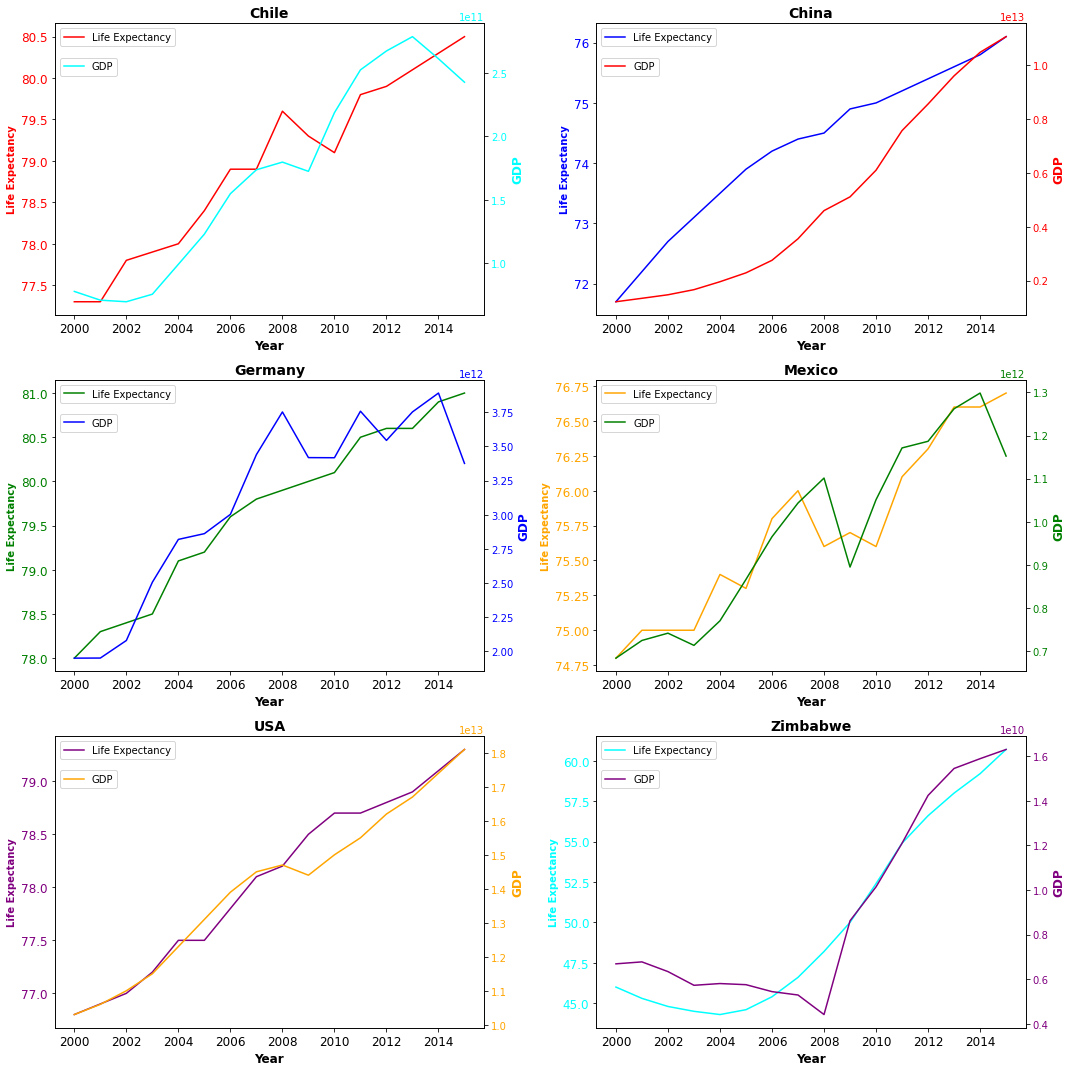

In [432]:
num_plots = len(countries)
rows = 3
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(15,15))
line_colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan']
for i, country in enumerate(countries):
    row = i // cols
    col = i % cols
    ax = axes[row, col]
    country_data = df[df['Country'] == country]
    color = line_colors[i]  

    ax.plot(country_data['Year'], country_data['LE'], label='Life Expectancy', color=color)
    ax.set_ylabel('Life Expectancy', color=color, fontweight='bold')
    ax.tick_params(axis='y', labelcolor=color)
    ax.set_xlabel('Year', fontsize=12, fontweight='bold')
    
    color = line_colors[i-1] 
    ax_twin = ax.twinx()
    ax_twin.plot(country_data['Year'], country_data['GDP'], label='GDP', color=color)
    ax_twin.set_ylabel('GDP', color=color, fontsize=12, fontweight='bold')
    ax_twin.tick_params(axis='y', labelcolor=color, labelsize=10)
    
    ax.set_title(country, fontsize=14, fontweight='bold')
    ax.legend(loc='upper left')
    ax_twin.legend(loc='upper left', bbox_to_anchor=(0, .9))
    ax.tick_params(labelsize=12) 
    


plt.tight_layout()
plt.savefig('gdp_vs_le.png')
plt.show()


#### These plots show Life Expectancy and GDP are connected, as GDP goes up of down LE follows. Interestingly Zimbabwe showing almost non existant on the other plots does show a huge increase in LE along with increase in GDP from a low of 45 years to 60+ in 7 years and increase from around 4 billion GDP to 1.6 billion annually. Though Zimbabwe is behind the rest of the Countries in the data relatively they are showing huge improvements.

## To sum up the questions asked were.

### Is life Expectancy correlated to the GDP:
#### -Yes from the data as GDP moves Life Expectancy moves with it, each plot showing GDP in mostly upward growth also showed an improvement in LE. Zimbabwe showing the most improvement in LE as GDP increased.
### Does GDP and LE increase with time.
#### -The plots do show GDP and LE increasing over time.
### What are the average LE and GDP by country:
#### -We did find the mean averages of both GDP and LE per Country.
### Does Country effect GDP and LE
#### -Yes, Country does effect GDP and LE, although showing improvement Zimbabwe was the lowest in GDP and LE 